In [1]:
import pandas as pd
import matplotlib

In [2]:
df_customers = pd.read_csv('./datasets/churn_customers.csv')

In [3]:
df_customers.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
df_customers.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No
7042,3186-AJIEK,Male,0,No,No


In [5]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [6]:
df_services = pd.read_csv('./datasets/churn_services.csv')

In [7]:
df_services.head(5)

,customerID,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Yes,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Yes,No,Fiber optic,No,No,No,No,No,No


In [8]:
df_contracts = pd.read_csv('./datasets/churn_contracts.csv')

In [9]:
df_contracts.head(5)

,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


É razoável tratar os dados antes de tudo!

In [10]:
#df_contracts['TotalCharges'] = df_contracts['TotalCharges'].astype(float)
#df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'])
df_contracts['TotalCharges'] = pd.to_numeric(df_contracts['TotalCharges'], errors = 'coerce')

In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
df_customers.rename(columns = {'SeniorCitizen':'Above65yo'})

,customerID,gender,Above65yo,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [13]:
df_customers_renamed = df_customers.rename(columns = {'SeniorCitizen':'Above65yo'})

In [14]:
df_customers.rename(columns = {'SeniorCitizen':'Above65yo'}, inplace = True)

In [15]:
df_customers.columns = ['IDCliente','Genero','Mais65anos','TemParceiro','TemDependentes']

In [16]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   IDCliente       7043 non-null   object
 1   Genero          7043 non-null   object
 2   Mais65anos      7043 non-null   int64 
 3   TemParceiro     7043 non-null   object
 4   TemDependentes  7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


## Merge

In [17]:
df_services.rename(columns = {'customerID':'IDCliente'},inplace=True)

In [18]:
df_temp = df_customers.merge(df_services, on = ['IDCliente'])

In [19]:
df_churn_temp = df_temp.merge(df_contracts, left_on = ['IDCliente'], right_on = ['customerID'])

In [20]:
df_churn_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [21]:
# Unificar os 3 df's ao mesmo tempo

In [22]:
df_churn = df_customers.merge(df_services, on = ['IDCliente']).merge(df_contracts, left_on = ['IDCliente'],right_on=['customerID'])

In [23]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDCliente         7043 non-null   object 
 1   Genero            7043 non-null   object 
 2   Mais65anos        7043 non-null   int64  
 3   TemParceiro       7043 non-null   object 
 4   TemDependentes    7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  customerID        7043 non-null   object 
 15  tenure            7043 non-null   int64  
 16  Contract          7043 non-null   object 


In [24]:
df_churn.drop( ['customerID'],axis = 1, inplace = True)

## Dados faltantes completamente ao acaso (MCAR - Missing Completely at Random)

O fato de que um certo valor está faltando não tem nada a ver com seu valor hipotético e com os valores de outras variáveis.

## Dados faltantes ao acaso (MAR - Missing at Random)

Faltar dados aleatoriamente significa que a propensão para um ponto de dados estar ausente não está relacionada aos dados ausentes, mas está relacionada a alguns dos dados observados.

## Dados faltantes não ao acaso (MNAR - Missing not at Random)

Duas razões possíveis são que o valor ausente depende do valor hipotético ou o valor ausente depende do valor de alguma outra variável.


In [25]:
df_churn.isna().sum()

IDCliente            0
Genero               0
Mais65anos           0
TemParceiro          0
TemDependentes       0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [26]:
df_churn['TotalCharges'].isna().sum()

11

In [27]:
#Quantas linhas tem pelo menos uma coluna com valor ausente?
df_churn[df_churn.isna().any(axis = 1)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,0,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,0,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,0,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,0,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,0,Two year,No,Mailed check,73.35,NaN,No


In [28]:
#Quantas colunas existem com pelo menos um valor ausente?
df_churn.isna().any(axis = 0).sum()

1

## Remover Valores Ausentes

In [29]:
df_churn.drop(columns = ['TotalCharges'], axis = 1)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [30]:
df_churn.dropna(axis = 1)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,34,One year,No,Mailed check,56.95,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,Yes


In [31]:
df_churn.dropna(axis = 1, how = 'all')

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [32]:
df_churn.dropna(axis= 0)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [33]:
df_churn.dropna(axis = 0, how = 'all')

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Imputação de Valores Ausentes

In [34]:
df_churn.fillna(0)

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [35]:
df_churn.fillna(value ={'TotalCharges':0, 'Genero': 'Não Declarado'})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
media_TotalCharges = df_churn.TotalCharges.mean()
df_churn.fillna(value ={'TotalCharges':media_TotalCharges, 'Genero': 'Não Declarado'})

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,34,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,45,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,24,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,72,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,No,11,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,4,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Análise Univariada

- A faixa etária do cliente tem uma forte associação com o churn
- Um cliente com menos de 6 meses de contrato é mais propenso ao Churn
- Cliente com contrato mensal é mais propenso ao Churn

In [37]:
df_churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [38]:
df_churn.Churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

[Text(0, 0, '5174'), Text(0, 0, '1869')]

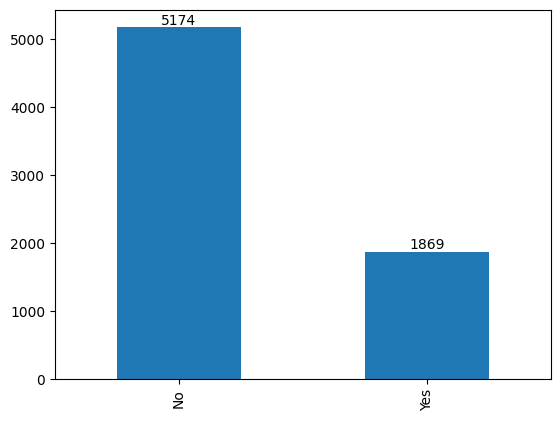

In [39]:
ax = df_churn.Churn.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.73463'), Text(0, 0, '0.26537')]

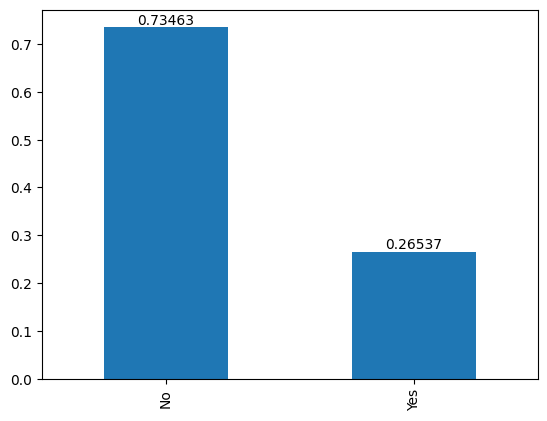

In [40]:
ax = df_churn.Churn.value_counts(normalize = True).plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '3875'), Text(0, 0, '1695'), Text(0, 0, '1473')]

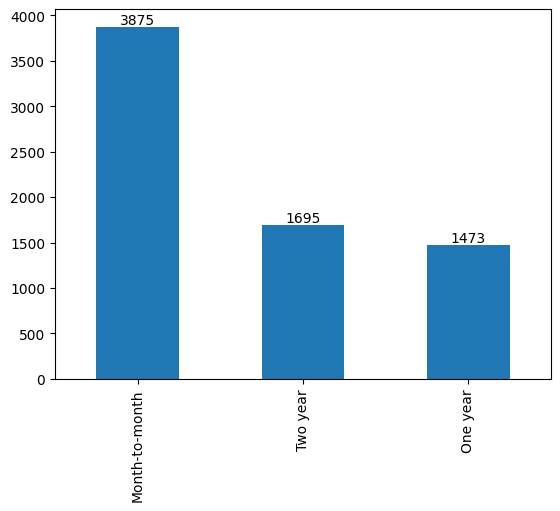

In [41]:
# Quais são os tipos de Contrato
ax = df_churn.Contract.value_counts().plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '0.550192'), Text(0, 0, '0.240664'), Text(0, 0, '0.209144')]

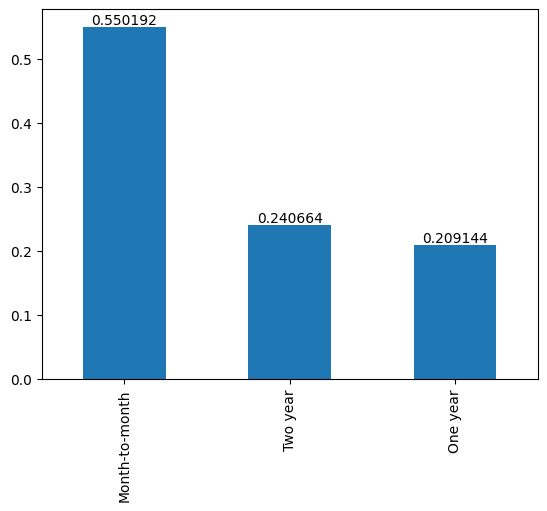

In [42]:
# Quais são os tipos de Contrato
ax = df_churn.Contract.value_counts(normalize = True).plot.bar()
ax.bar_label(ax.containers[0])

In [43]:
df_churn.columns

Index(['IDCliente', 'Genero', 'Mais65anos', 'TemParceiro', 'TemDependentes',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'tenure', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: ylabel='Frequency'>

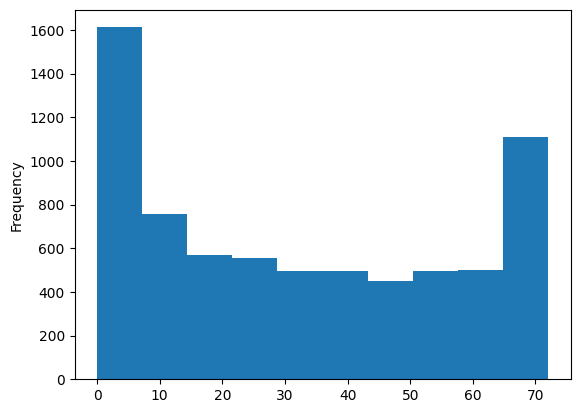

In [44]:
df_churn.tenure.plot.hist()

- A variável tempo de contrato (tenure não apresenta visualmente uma distribuição normal.
- A grande maioria dos valores se concentram nos extremos, ou seja, contratos com poucos meses de ativação e contratos longos, acima aproximadamente dos 65 meses

<Axes: >

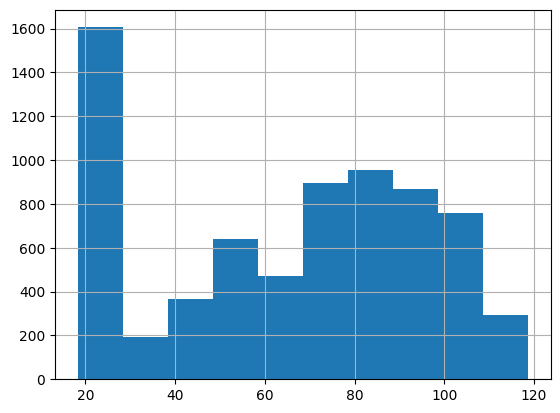

In [45]:
df_churn.MonthlyCharges.hist()

In [46]:
df_churn.tenure.mean()

32.37114865824223

In [47]:
df_churn.tenure.median()

29.0

In [48]:
df_churn.tenure.mode()

0    1
Name: tenure, dtype: int64

In [49]:
df_churn.tenure.std()

24.55948102309446

In [50]:
coeficiente_variacao = (df_churn.tenure.std() / df_churn.tenure.mean()) * 100
print(f"Coeficiente de Variação: {coeficiente_variacao:.2f}%")


Coeficiente de Variação: 75.87%


## Filtrar e Agrupar Informaçõe dos DataFrames

In [51]:
# Quantos clientes possuem 1 mês de contrato
len(df_churn[(df_churn.tenure == 1)])

613

In [52]:
# Quanto esses clientes representam percentualmente em relação à base?
percentual = len(df_churn[(df_churn.tenure == 1)])/len(df_churn) * 100
print(f"Percentual: {coeficiente_variacao:.2f}%")

Percentual: 75.87%


In [53]:
df_churn[(df_churn.tenure >=1) & (df_churn.tenure <=6)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,2,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
20,8779-QRDMV,Male,1,No,No,No,No phone service,DSL,No,No,...,No,No,Yes,1,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Mailed check,20.15,20.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7029,2235-DWLJU,Female,1,No,No,No,No phone service,DSL,No,No,...,No,Yes,Yes,6,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,Female,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,2,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,Male,1,No,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [54]:
df_churn[(df_churn.Genero == 'Male') & (df_churn.tenure <=6)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,2,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
20,8779-QRDMV,Male,1,No,No,No,No phone service,DSL,No,No,...,No,No,Yes,1,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
22,1066-JKSGK,Male,0,No,No,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,1,Month-to-month,No,Mailed check,20.15,20.15,Yes
27,8665-UTDHZ,Male,0,Yes,Yes,No,No phone service,DSL,No,Yes,...,No,No,No,1,Month-to-month,No,Electronic check,30.20,30.20,Yes
31,4929-XIHVW,Male,1,Yes,No,Yes,No,Fiber optic,No,No,...,No,Yes,Yes,2,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999,2108-XWMPY,Male,0,No,No,No,No phone service,DSL,Yes,Yes,...,No,No,No,3,Month-to-month,Yes,Mailed check,35.45,106.85,Yes
7001,6304-IJFSQ,Male,0,No,No,Yes,No,DSL,No,Yes,...,No,No,No,3,Month-to-month,Yes,Mailed check,49.90,130.10,Yes
7018,1122-JWTJW,Male,0,Yes,Yes,Yes,No,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7032,6894-LFHLY,Male,1,No,No,Yes,Yes,Fiber optic,No,No,...,No,No,No,1,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


<Axes: ylabel='tenure'>

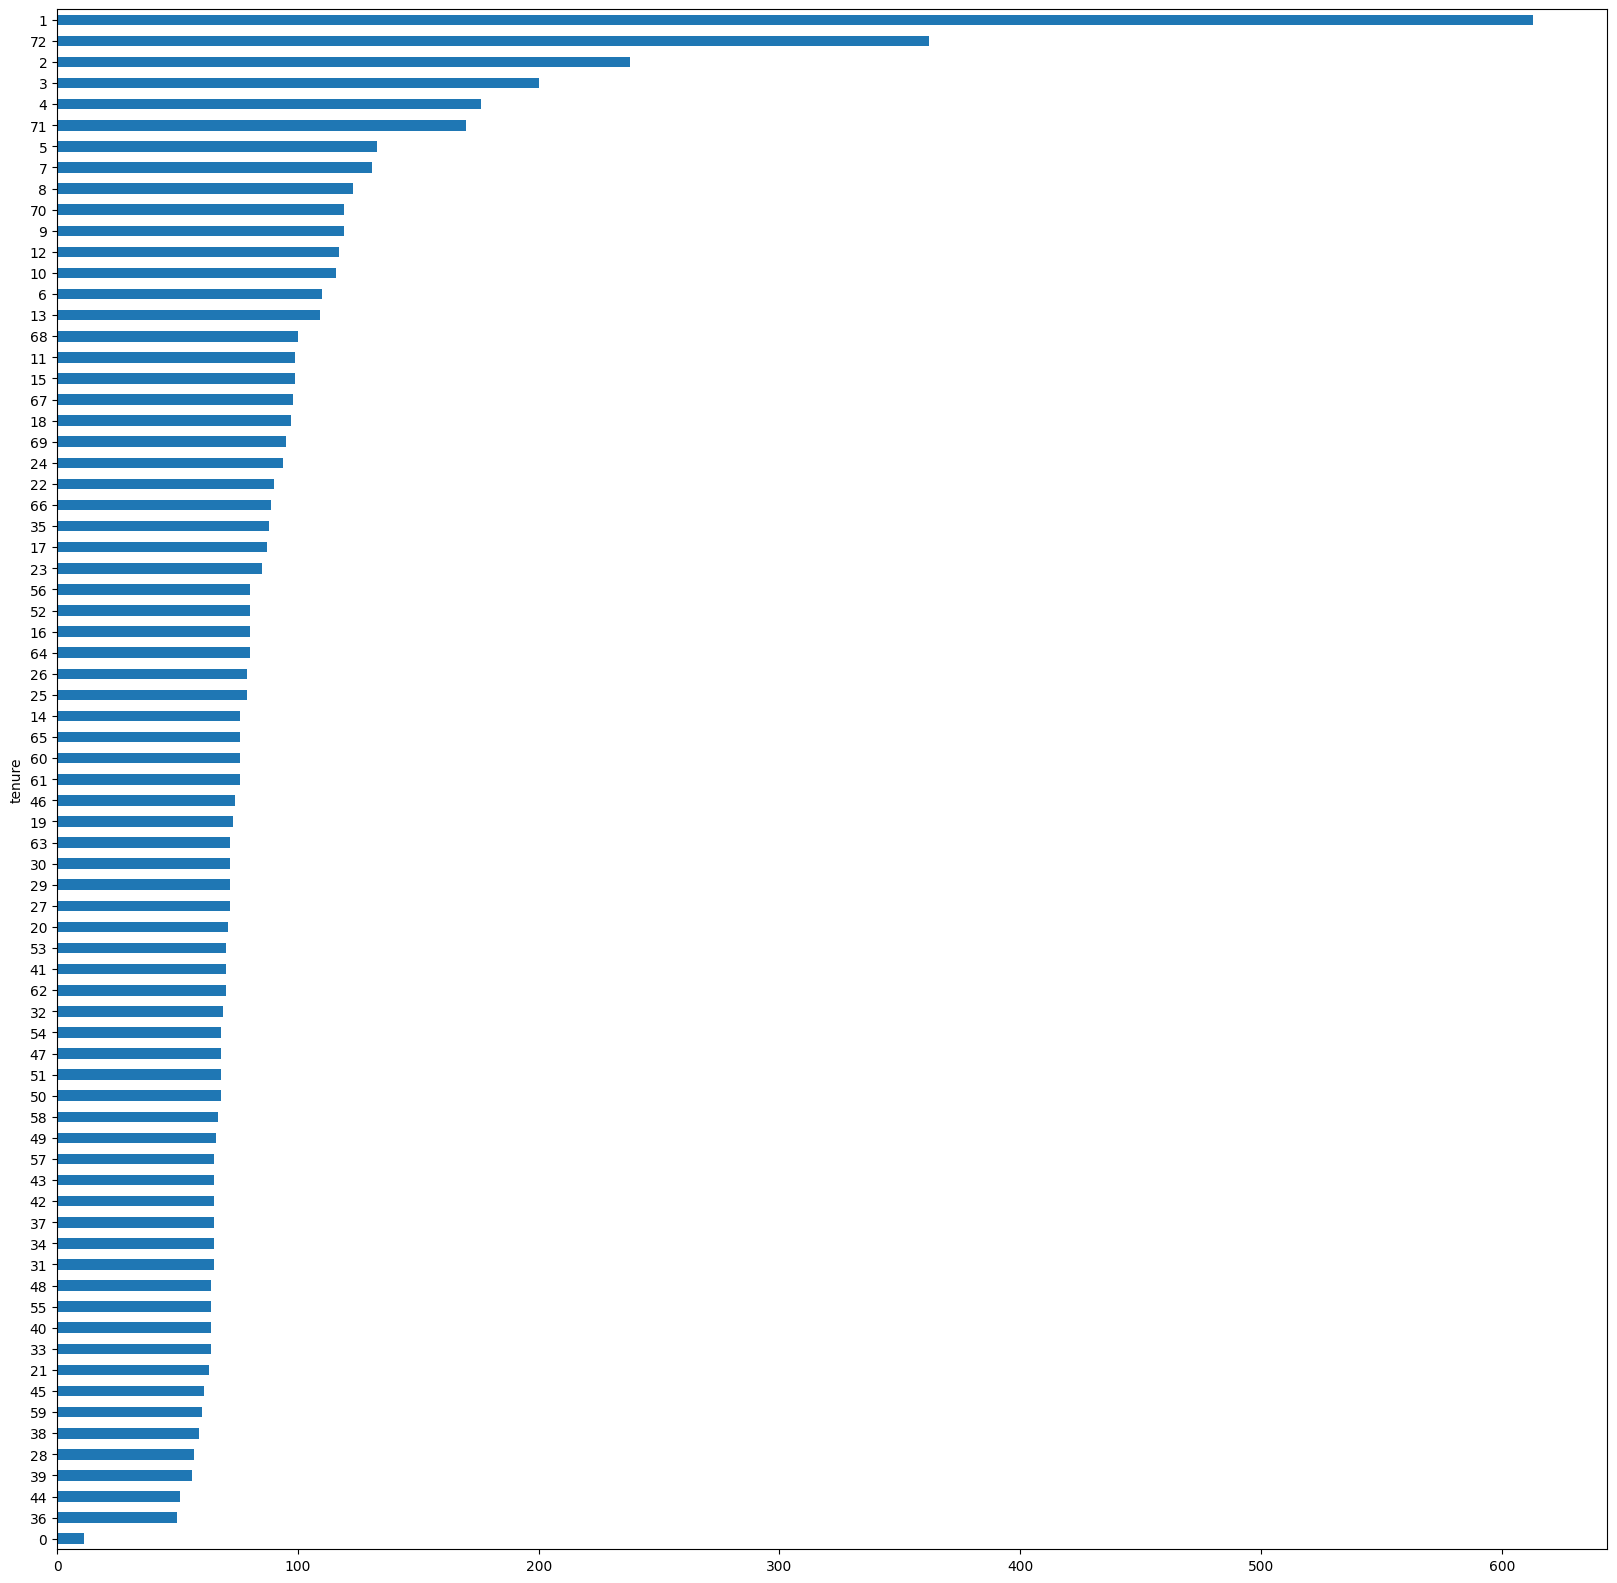

In [55]:
df_churn.groupby(['tenure'])['tenure'].count().sort_values().plot.barh(figsize = (20,20))

## Análise Bi-Variada

In [56]:
# Hipótese: Clientes com contrato do tipo mensal são mais propensos ao Churn - Quantidade
#Construir Tabela de Contingência entre Tipo de Contrato e Churn
pd.crosstab(df_churn.Churn,df_churn.Contract, margins = True, margins_name = 'Total')

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,2220,1307,1647,5174
Yes,1655,166,48,1869
Total,3875,1473,1695,7043


In [57]:
# Hipótese: Clientes com contrato do tipo mensal são mais propensos ao Churn - Proporção
#Construir Tabela de Contingência entre Tipo de Contrato e Churn
pd.crosstab(df_churn.Churn,df_churn.Contract, normalize = True, margins = True, margins_name = 'Total')

Contract,Month-to-month,One year,Two year,Total
Churn,,,,
No,0.315207,0.185574,0.233849,0.73463
Yes,0.234985,0.023570,0.006815,0.26537
Total,0.550192,0.209144,0.240664,1.00000


In [58]:
# Hipótese: Clientes com contrato do tipo mensal são mais propensos ao Churn - Proporção
#Construir Tabela de Contingência entre Tipo de Contrato e Churn
pd.crosstab(df_churn.Churn,df_churn.Contract, normalize = 'index', margins = True, margins_name = 'Total')

Contract,Month-to-month,One year,Two year
Churn,,,
No,0.429068,0.252609,0.318322
Yes,0.885500,0.088818,0.025682
Total,0.550192,0.209144,0.240664


Considerando o público total, os clientes de contrato mensal representam 55%. Porém, se considerarmos apenas oclientes que abandonaram o serviço, 88% tinham contrato mensal. Dessa forma, podemos afirmar que há uma correlação entre o tipo de contrato mensal e o abandono.

In [59]:
# Avaliar a correlação entre duas variáveis categóricas (qualitativas)
# Executar um teste de hipóteses chamado Chi-Square ou Qui-Quadrado de Pearson
# Num teste de hi´´otese, duas hipóteses são formuladas:
# H0 (Hipótese Nula): As duas variáveis são Independentes
# H1 (Hipótese Complementar): as duas variáveis não são independentes

# O teste serve para confirmar ou recusar a hipótese nula (H0)
# Quando a probabilidade de observarmos H0 é inferior a 0.05 (p-value),
# recusamos a hipótese nula e seguimos com a complementar

In [60]:
# Gerar um DF da Crosstab (sem totais)
df_crosstab_churn_contract = pd.crosstab(df_churn.Churn, df_churn.Contract)

In [61]:
from scipy.stats import chi2_contingency

In [62]:
chis_scores_churn_contract = chi2_contingency(df_crosstab_churn_contract)

In [63]:
chis_scores_churn_contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

In [64]:
scores_churn_contract = pd.Series(chis_scores_churn_contract[0])

pvalues_churn_contract = pd.Series(chis_scores_churn_contract[1])

In [65]:
#Apresentar numeros com decimais sem a notacao cientifica
pd.set_option('display.float_format', lambda x: '%.15f' % x)

In [66]:
df_chi_scores_churn_contract = pd.DataFrame({"Qui2": scores_churn_contract,
                                            "p-value": pvalues_churn_contract})

In [67]:
df_chi_scores_churn_contract

,Qui2,p-value
0,1184.596572083792580,0.000000000000000


Conforme teste estatístico (Chi-Square), o P-value <= 0.05, desta forma rejeitamos a hipótese nula, ou seja, as variveis não são independentes. Pelo Qui2 Alto, podemos afirmar que há uma forte correlação

In [68]:
# Avaliar a correlação entre uma variável qualitativa e quantitativa
# Usar o mesmo teste de CHi-Square, mas transformar a variável quantitativa em qualitativa
# Hipótese: Cliente com menos de 6 meses de contrato é mais propenso ao Churn

In [69]:
# Criar uma coluna nova no DataFrame com base numa condição de outra Coluna
# Coluna = 'TempoMenor6Meses'

In [70]:
import numpy as np

In [71]:
df_churn['TempoMenor6Meses'] = np.where(df_churn.tenure<6, 'Yes', 'No')

In [72]:
df_crosstab_churn_tenure = pd.crosstab(df_churn.Churn, df_churn.TempoMenor6Meses)

In [73]:
chis_scores_churn_tenure = chi2_contingency(df_crosstab_churn_tenure)

In [74]:
scores_churn_tenure = pd.Series(chis_scores_churn_tenure[0])

pvalues_churn_tenure = pd.Series(chis_scores_churn_tenure[1])

In [75]:
df_chi_scores_churn_tenure = pd.DataFrame({"Qui2": scores_churn_tenure,
                                            "p-value": pvalues_churn_tenure})

In [76]:
df_chi_scores_churn_tenure

,Qui2,p-value
0,669.721615828710242,0.000000000000000


Com o p-value < 0.05, rejeitamos H0. Vale mencionar que a correlação entre churn e TempoMenor6Meses é menor que a correlação entre Churn e Tipo de Contrato

In [77]:
# Correlação entre tenure e TotalCharges - Duas Variáveis Numéricas
# Pearson
df_churn.tenure.corr(df_churn.TotalCharges)

0.8258804609332018

In [78]:
df_churn.tenure.corr(df_churn.TotalCharges, method = 'spearman')

0.8891770805365491

Há uma forte correlação entre tenure e TotalCharges

<Axes: xlabel='tenure', ylabel='TotalCharges'>

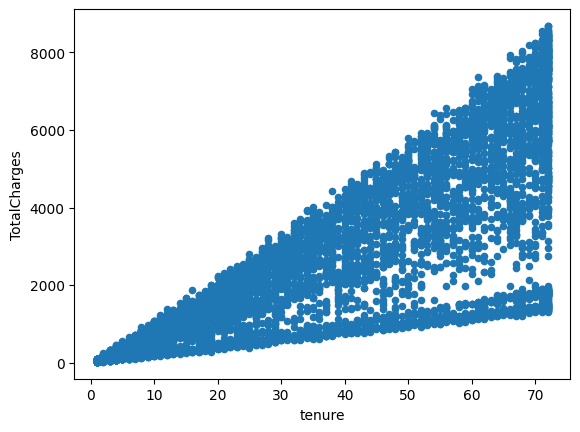

In [79]:
df_churn.plot.scatter(x= 'tenure', y= 'TotalCharges')

- Desafio 1: Validar a primeira hipótese de que a faixa etária do cliente tem uma forte associacção com o Churn.
- Desafio 2: Validar com Teste de Hipótese se Contrato Mensal está mais propenso ao Churn.

## Lidando com Outliers

In [80]:
#Remover Linhas com valores nulos
df_churn.dropna(axis = 0, inplace = True)

<Axes: >

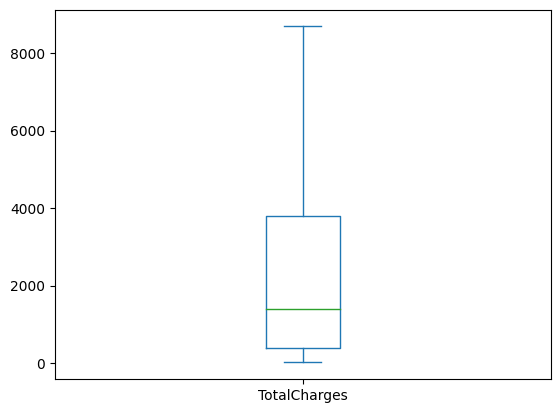

In [81]:
# Boxplot Geral 
df_churn['TotalCharges'].plot.box()

TotalCharges    Axes(0.125,0.11;0.775x0.77)
dtype: object

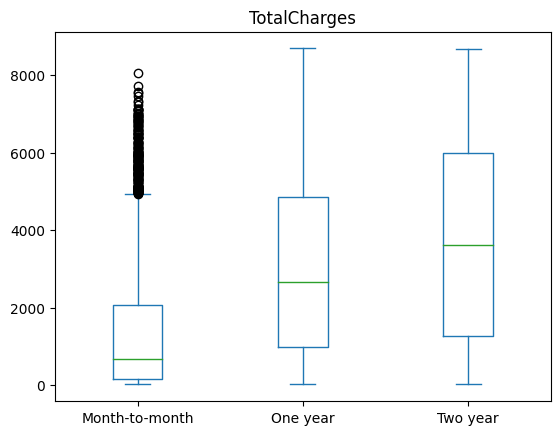

In [82]:
#Boxplot Agrupado por Contract
df_churn.plot.box(column ='TotalCharges', by  = 'Contract')

In [83]:
#Criar um datagrame somente com clientes Month to Month
df_churn_month = df_churn[df_churn.Contract == 'Month-to-month']
df_churn_month

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,1,Month-to-month,Yes,Electronic check,29.850000000000001,29.850000000000001,No,Yes
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,2,Month-to-month,Yes,Mailed check,53.850000000000001,108.150000000000006,Yes,Yes
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,2,Month-to-month,Yes,Electronic check,70.700000000000003,151.650000000000006,Yes,Yes
5,9305-CDSKC,Female,0,No,No,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,8,Month-to-month,Yes,Electronic check,99.650000000000006,820.500000000000000,Yes,No
6,1452-KIOVK,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,22,Month-to-month,Yes,Credit card (automatic),89.099999999999994,1949.400000000000091,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,38,Month-to-month,Yes,Credit card (automatic),69.500000000000000,2625.250000000000000,No,No
7034,0639-TSIQW,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,67,Month-to-month,Yes,Credit card (automatic),102.950000000000003,6886.250000000000000,Yes,No
7035,8456-QDAVC,Male,0,No,No,Yes,No,Fiber optic,No,No,...,Yes,No,19,Month-to-month,Yes,Bank transfer (automatic),78.700000000000003,1495.099999999999909,No,No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,...,No,No,11,Month-to-month,Yes,Electronic check,29.600000000000001,346.449999999999989,No,No


<Axes: ylabel='Frequency'>

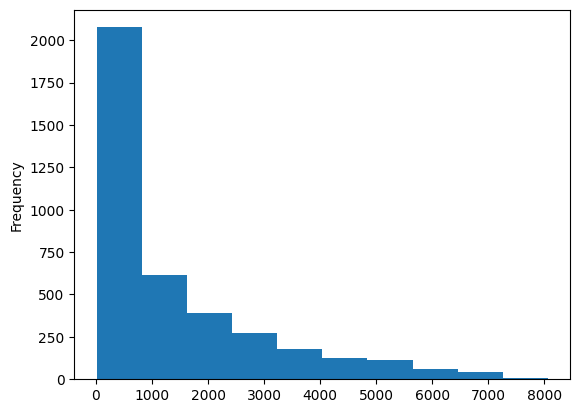

In [84]:
df_churn_month['TotalCharges'].plot.hist()

In [85]:
# Método de Turkey - IQR (Interquartile Range) - Distribuição Não-Normal
# IQR = 3º Quartil - 1º Quartil
q1_TotalChargesMonth = df_churn_month.TotalCharges.quantile(0.25)
q3_TotalChargesMonth = df_churn_month.TotalCharges.quantile(0.75)
iqr_TotalCharges_month = q3_TotalChargesMonth - q1_TotalChargesMonth
iqr_TotalCharges_month

1906.4

In [86]:
# Limites Inferior e Superior
limInf_TotalCharges_month = q1_TotalChargesMonth - (iqr_TotalCharges_month * 1.5)
limSup_TotalCharges_month = q3_TotalChargesMonth + (iqr_TotalCharges_month * 1.5)
limInf_TotalCharges_month, limSup_TotalCharges_month

(-2699.5000000000005, 4926.1)

In [87]:
df_churn_month[(df_churn_month.TotalCharges < limInf_TotalCharges_month) | (df_churn_month.TotalCharges > limSup_TotalCharges_month)]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
13,0280-XJGEX,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,49,Month-to-month,Yes,Bank transfer (automatic),103.700000000000003,5036.300000000000182,Yes,No
61,1215-FIGMP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,60,Month-to-month,Yes,Bank transfer (automatic),89.900000000000006,5450.699999999999818,No,No
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,No
110,0486-HECZI,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,No,55,Month-to-month,Yes,Electronic check,96.750000000000000,5238.899999999999636,Yes,No
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,2363-BJLSL,Male,0,No,No,Yes,No,DSL,No,Yes,...,Yes,Yes,62,Month-to-month,Yes,Bank transfer (automatic),80.400000000000006,4981.149999999999636,No,No
6952,6394-MFYNG,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,48,Month-to-month,Yes,Bank transfer (automatic),107.400000000000006,5121.300000000000182,Yes,No
6965,7789-CRUVC,Female,1,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,61,Month-to-month,Yes,Credit card (automatic),94.200000000000003,5895.449999999999818,No,No
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,No


## Técnica Z-Score - A quantos STDs um ponto está de distância da média
- Usado em variáveis normalmente distribuídas

In [88]:
from scipy.stats import zscore
z = np.abs(zscore(df_churn_month.TotalCharges))

In [89]:
df_churn_month[z> 3.0]

,IDCliente,Genero,Mais65anos,TemParceiro,TemDependentes,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TempoMenor6Meses
93,6067-NGCEU,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,65,Month-to-month,Yes,Credit card (automatic),111.049999999999997,7107.000000000000000,No,No
197,6168-YBYNP,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,59,Month-to-month,Yes,Electronic check,111.349999999999994,6519.750000000000000,No,No
339,1343-EHPYB,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.400000000000006,6603.000000000000000,Yes,No
402,0979-PHULV,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,69,Month-to-month,Yes,Credit card (automatic),99.450000000000003,7007.600000000000364,Yes,No
445,7752-XUSCI,Female,0,No,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,60,Month-to-month,Yes,Electronic check,105.900000000000006,6396.449999999999818,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6565,1548-FEHVL,Male,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,61,Month-to-month,Yes,Electronic check,106.200000000000003,6375.199999999999818,No,No
6587,7426-GSWPO,Male,1,No,No,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,64,Month-to-month,Yes,Bank transfer (automatic),103.500000000000000,6548.649999999999636,No,No
6713,4989-LIXVT,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,68,Month-to-month,Yes,Electronic check,95.900000000000006,6503.199999999999818,No,No
7023,1035-IPQPU,Female,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,63,Month-to-month,Yes,Electronic check,103.500000000000000,6479.399999999999636,No,No


## Automatizando EDA

In [90]:
# SweetViz - Abrir no Jupyter Notebook
import sweetviz as sv
sv_churn_report = sv.analyze (df_churn,target_feat = 'Churn')

                                             |                                             | [  0%]   00:00 ->…


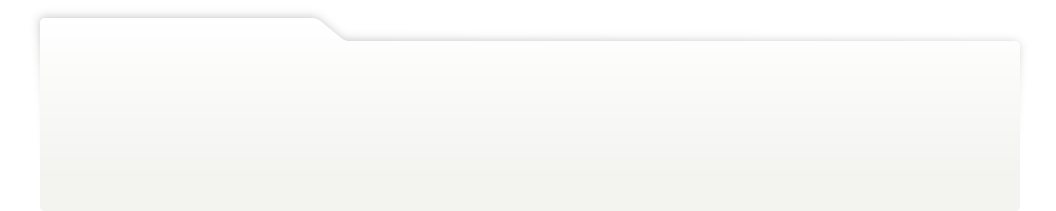
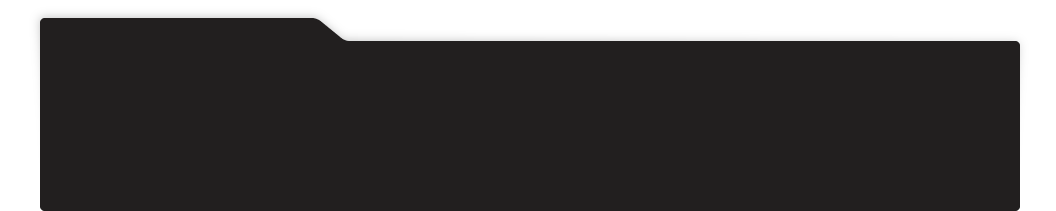
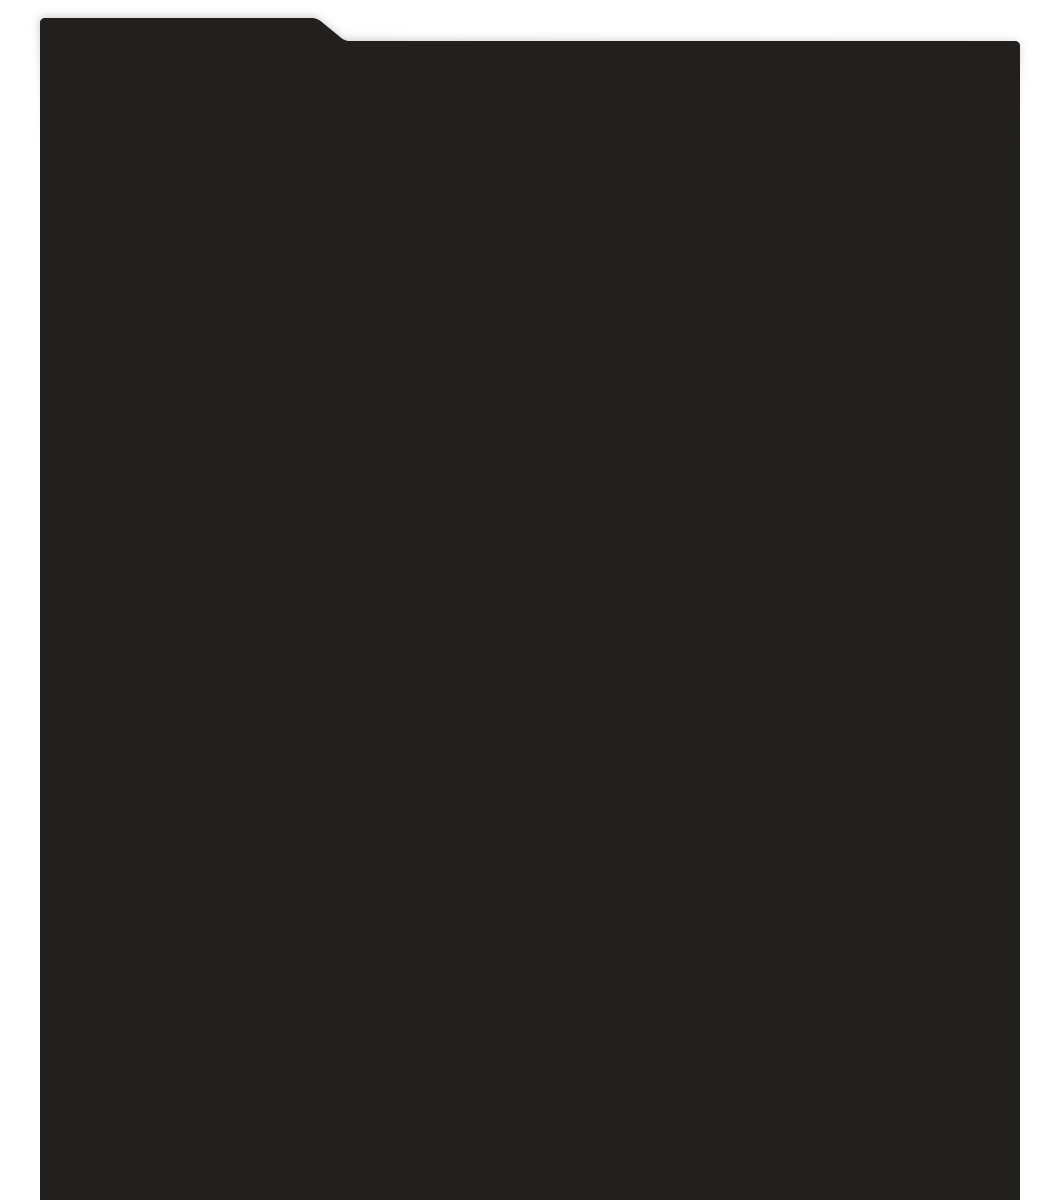
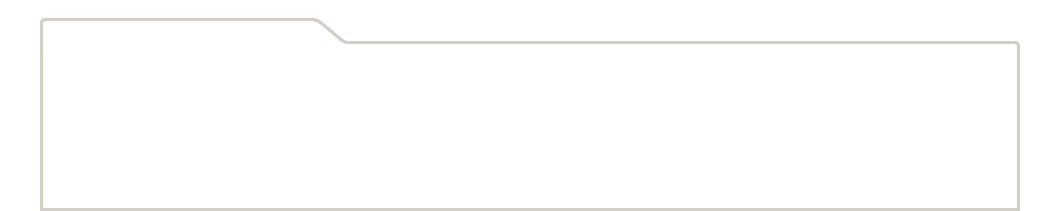
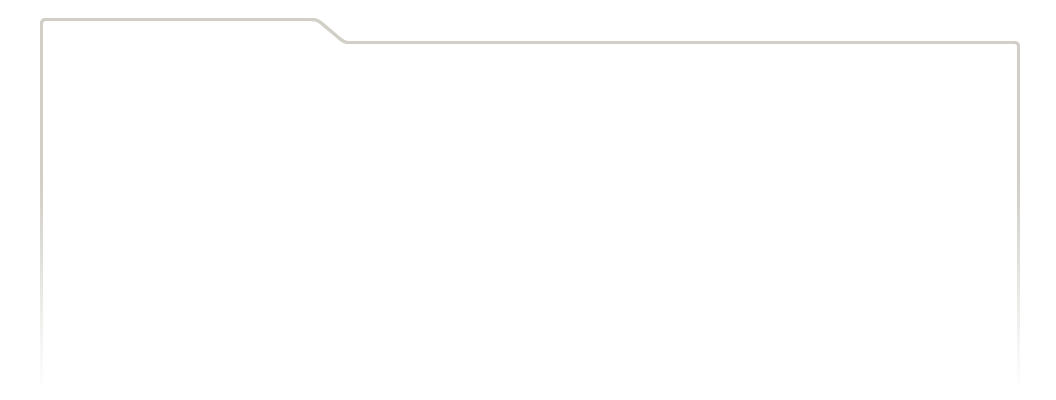
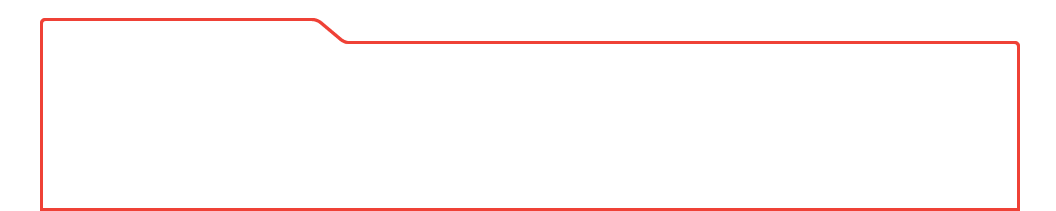
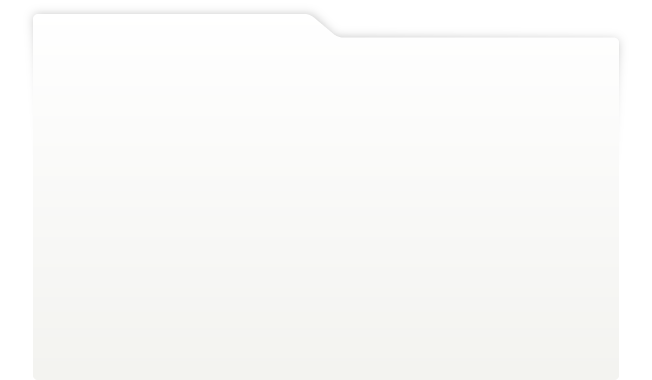
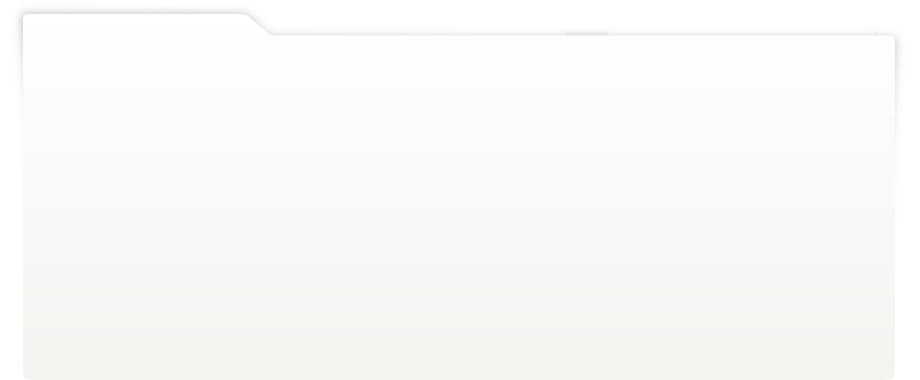
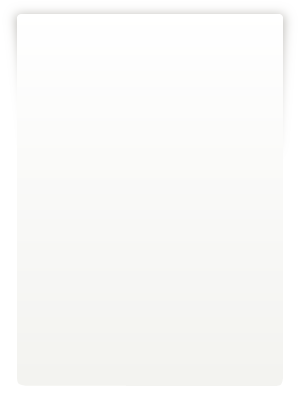
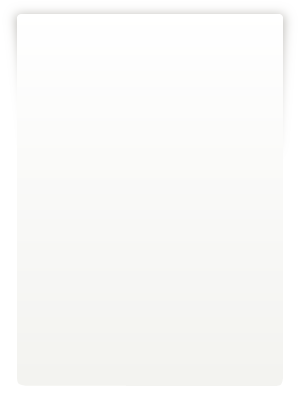
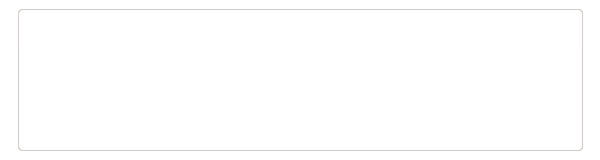
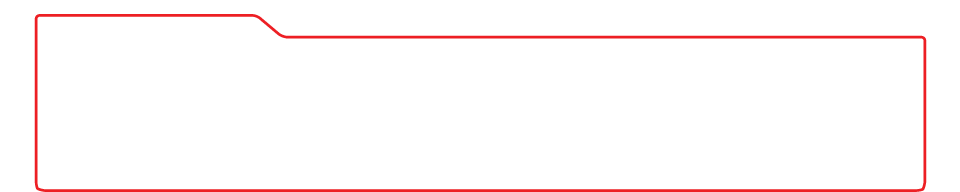
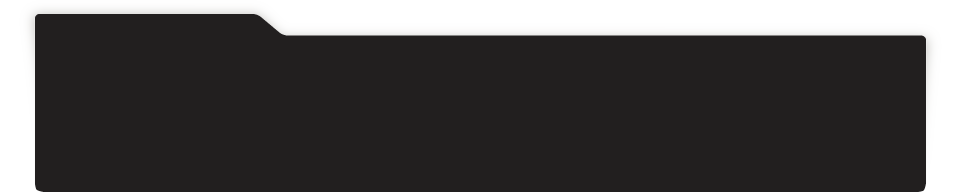
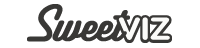
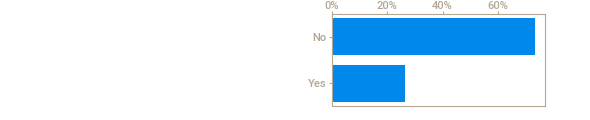
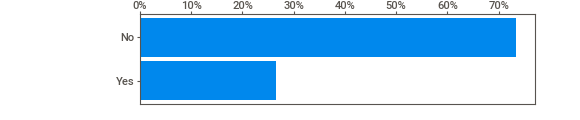
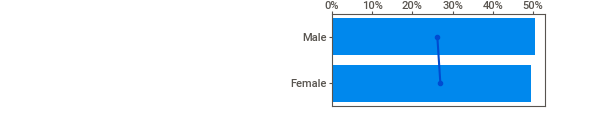
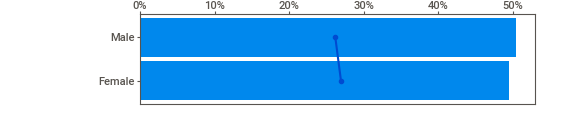
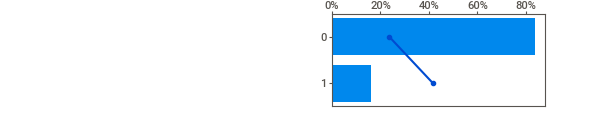
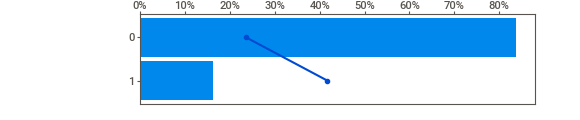
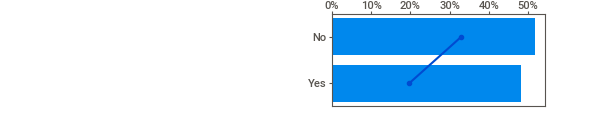
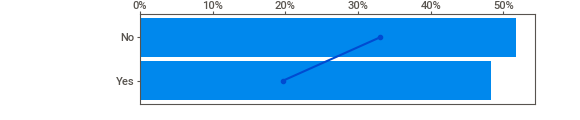
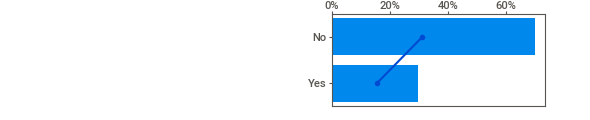
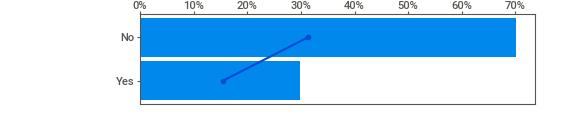
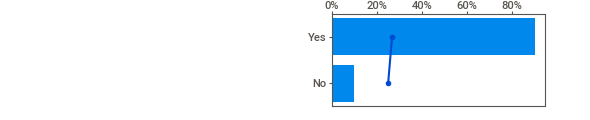
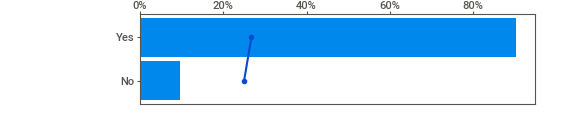
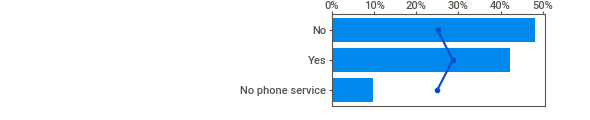
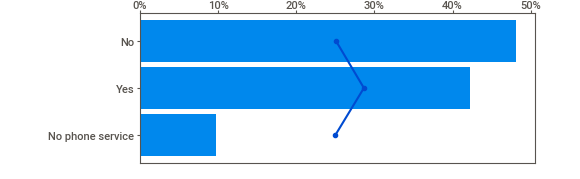
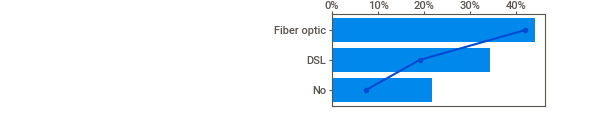
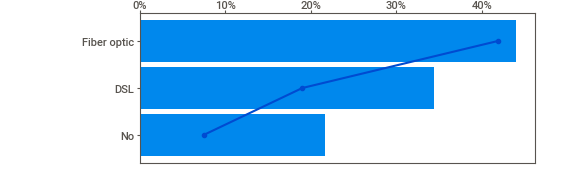
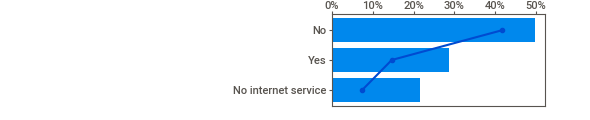
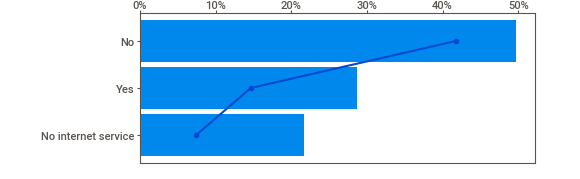
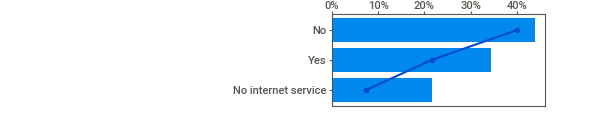
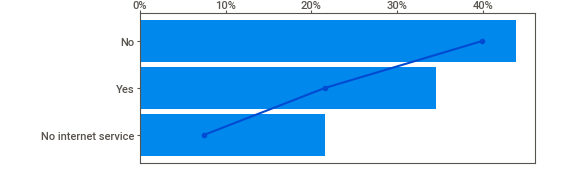
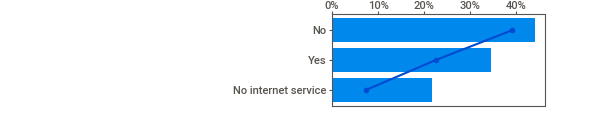
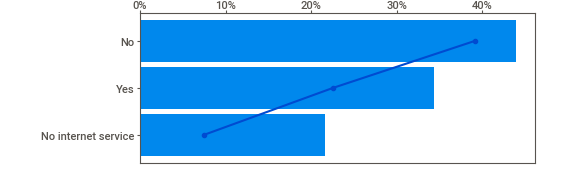
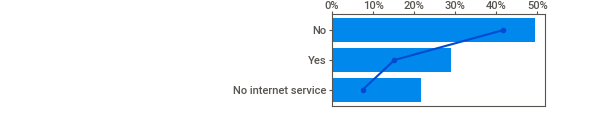
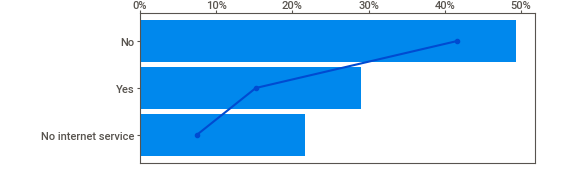
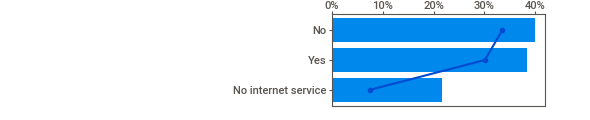
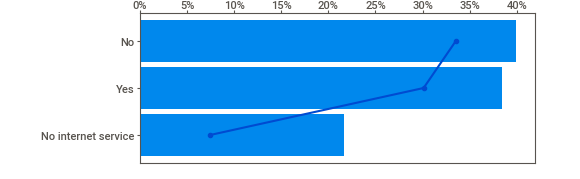
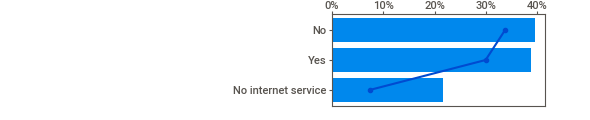
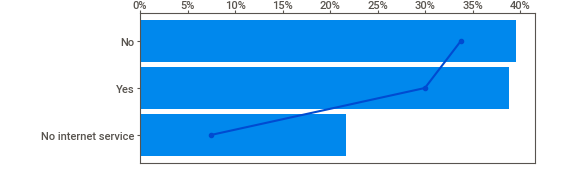
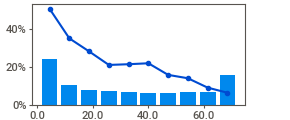
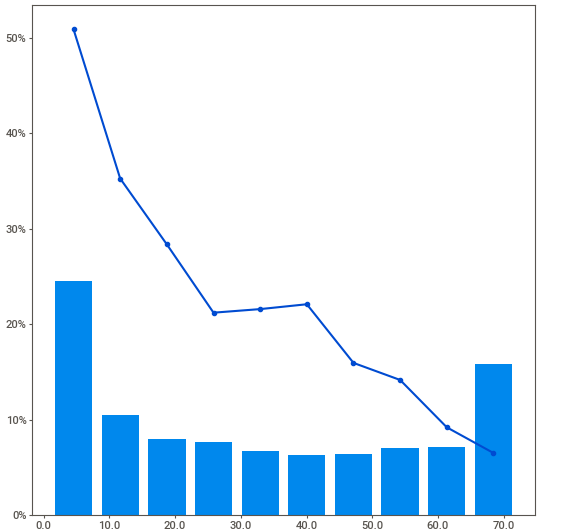
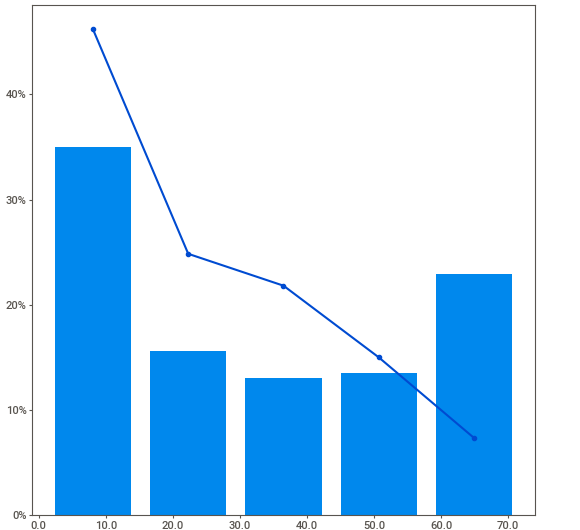
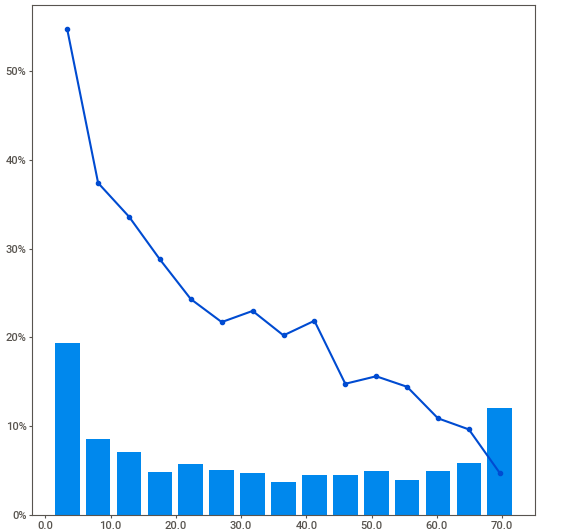
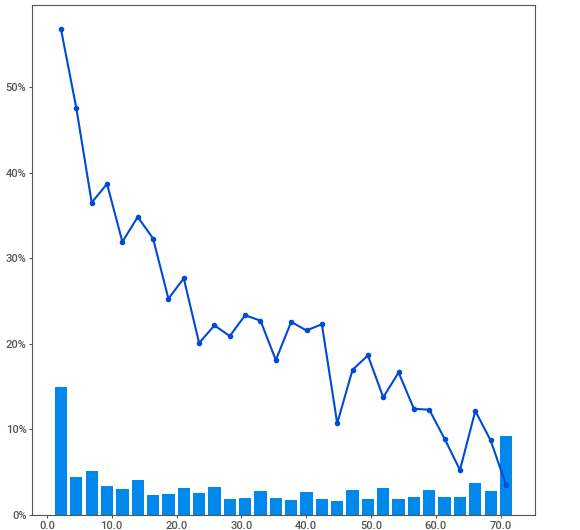
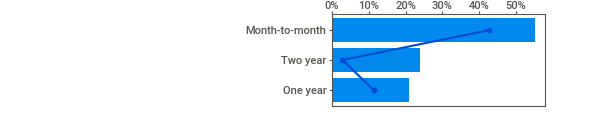
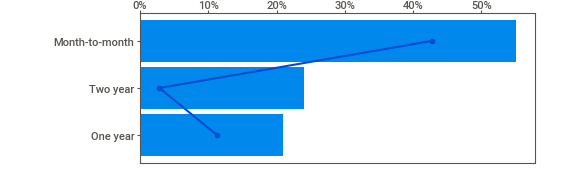
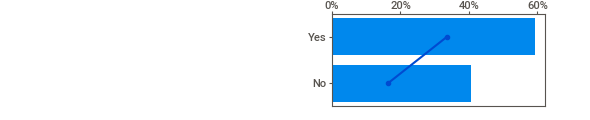
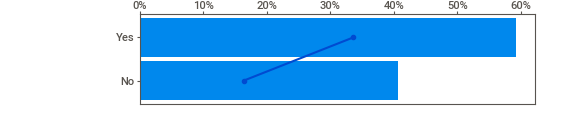
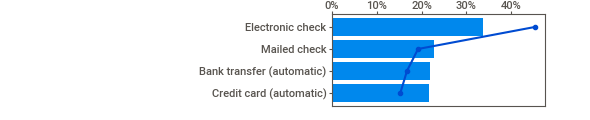
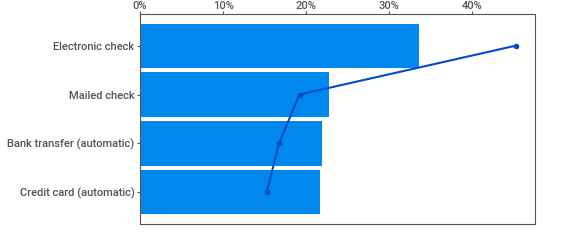
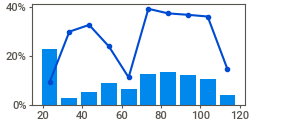
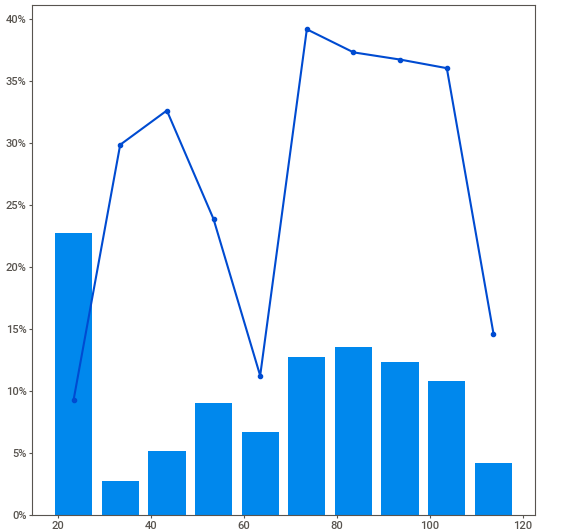
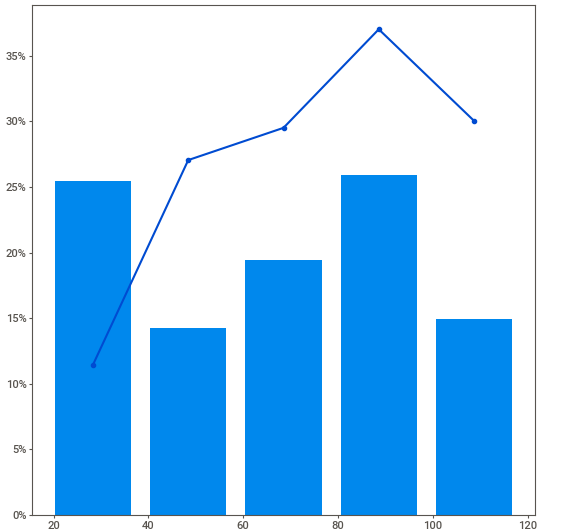
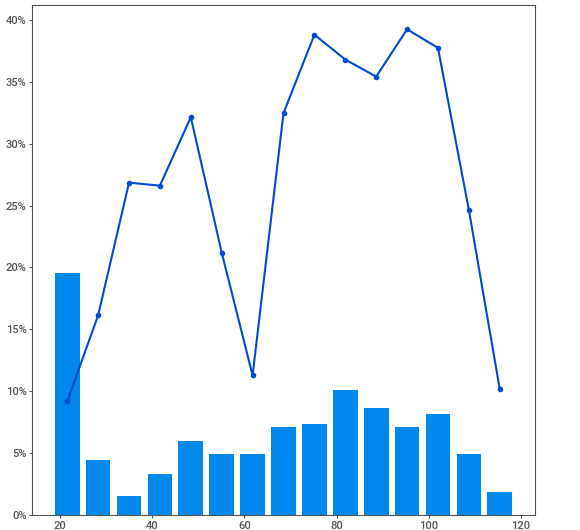
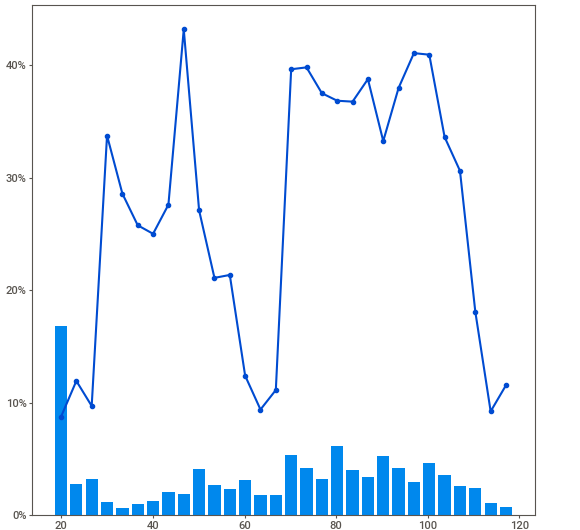
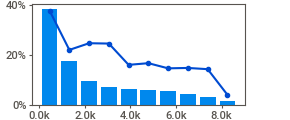
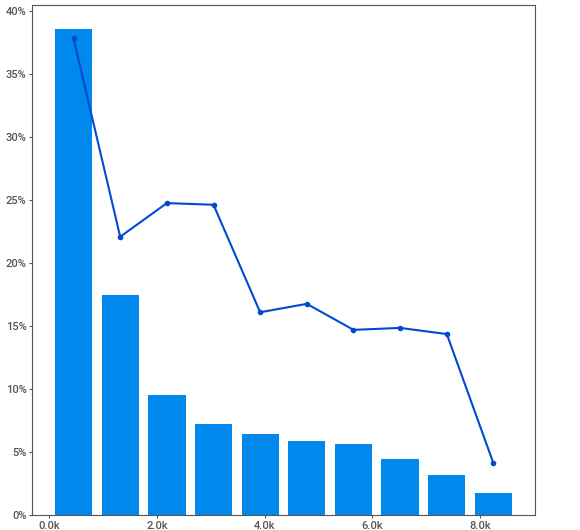
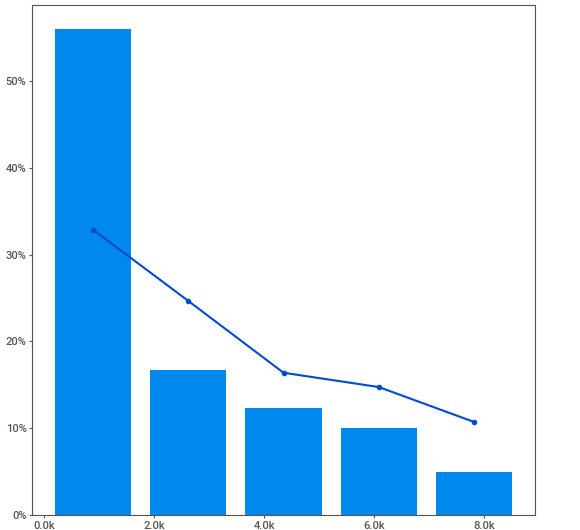
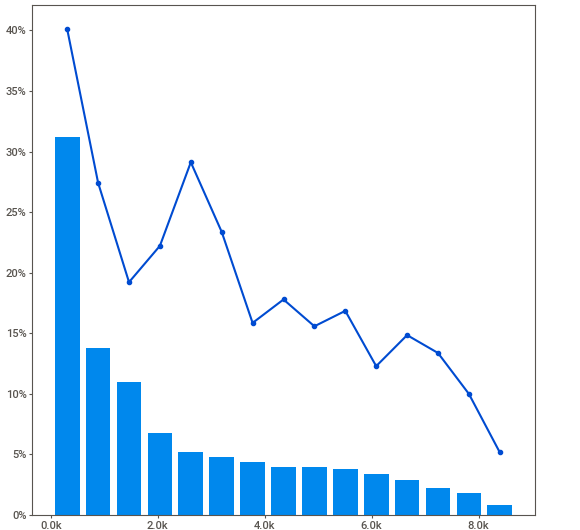
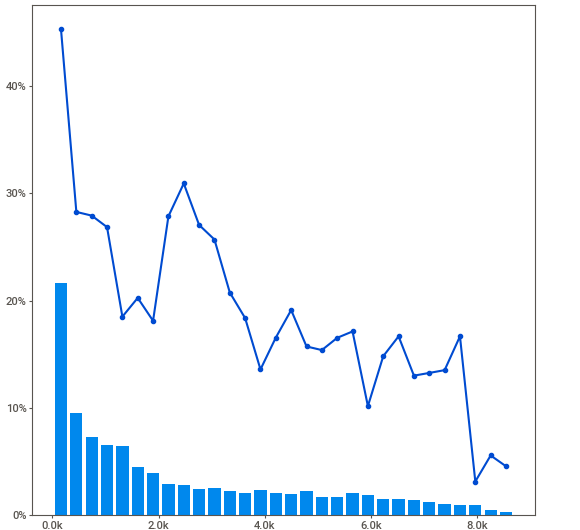
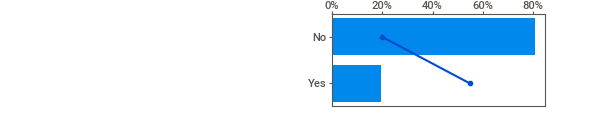
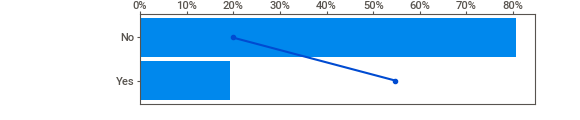
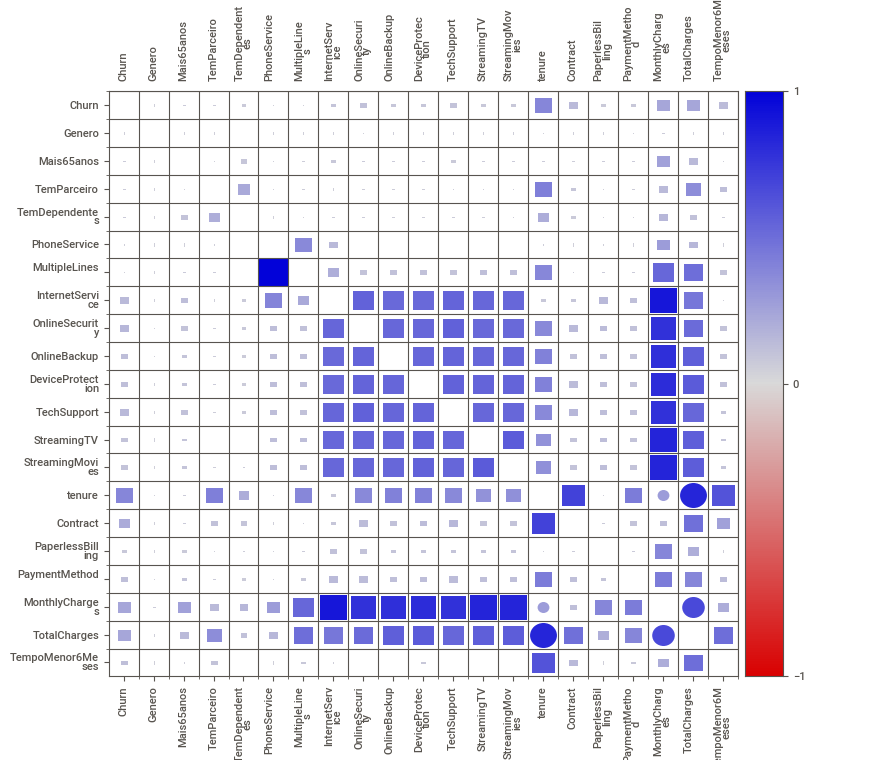
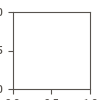

In [91]:
sv_churn_report.show_notebook()

In [92]:
# SweetViz - HTML
sv_churn_report.show_html(filepath ='./report_churn.html', open_browser = False, layout = 'widescreen')

Report ./report_churn.html was generated.
